In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("heartdisease.csv")

In [3]:
df.head(10)

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
5,65,1,4,150,236,1,1,105,1,0,?,?,?,3
6,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
7,60,1,3,120,0,?,0,141,1,2,1,?,?,3
8,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1
9,56,1,2,126,166,0,1,140,0,0,?,?,?,0


In [4]:
df1=df

In [5]:
missing_values = [ "?"]
df1 = pd.read_csv("heartdisease.csv", na_values = missing_values)

In [6]:
df1.isnull().sum()

63       0
1        0
4        0
140     56
260      7
0        7
1.1      0
112     53
1.2     53
3       56
2      102
?      197
?.1    165
2.1      0
dtype: int64

In [7]:
df1.columns=["age",
 "sex",
 "cp",
 "trestbps",
 "chol",
 "fbs",
 "restecg",
 "thalach",
 "exang",
 "oldpeak",
 "slope",
 "ca",
 "thal",
 "presence of heartdisease"]

In [8]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence of heartdisease
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [9]:
df1.isnull().sum()

age                           0
sex                           0
cp                            0
trestbps                     56
chol                          7
fbs                           7
restecg                       0
thalach                      53
exang                        53
oldpeak                      56
slope                       102
ca                          197
thal                        165
presence of heartdisease      0
dtype: int64

In [10]:
#missing values are present lets remove them column by column
df1['trestbps'].fillna(df1['trestbps'].mean(),inplace=True)

In [11]:
df1['chol'].fillna(df1['chol'].mean(),inplace=True)

In [12]:
df1['fbs'].fillna(0,inplace=True)

In [13]:
df1['thalach'].fillna(df1['thalach'].mean(),inplace=True)

In [14]:
df1['exang'].fillna(0,inplace=True)

In [15]:
df1['oldpeak'].fillna(df1['oldpeak'].mean(),inplace=True)

In [16]:
df1['slope'].fillna(df1['slope'].mean(),inplace=True)

In [17]:
df1['ca'].fillna(df1['slope'].mean(),inplace=True)

In [18]:
df1['thal'].fillna(df1['thalach'].mean(),inplace=True)

In [19]:
df1.head()
#now missing values are removed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence of heartdisease
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.134021,2.134021,122.869863,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.000000,2.134021,122.869863,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.000000,2.134021,122.869863,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.000000,2.134021,122.869863,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.000000,2.134021,122.869863,0


In [20]:
df.shape

(199, 14)

In [21]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence of heartdisease
count,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,133.72028,178.322917,0.341709,0.733668,122.869863,0.472362,1.309091,2.134021,2.112573,102.952399,1.517588
std,7.827080,0.171433,0.796928,18.29815,112.144792,0.475479,0.684918,18.867497,0.500495,0.932462,0.467411,0.213397,43.990784,1.222038
min,35.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.50000,119.500000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,2.134021,122.869863,0.000000
50%,60.000000,1.000000,4.000000,133.72028,214.000000,0.000000,1.000000,122.869863,0.000000,1.309091,2.134021,2.134021,122.869863,1.000000
75%,64.000000,1.000000,4.000000,140.00000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.134021,2.134021,122.869863,3.000000
max,77.000000,1.000000,4.000000,190.00000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,2.134021,122.869863,4.000000


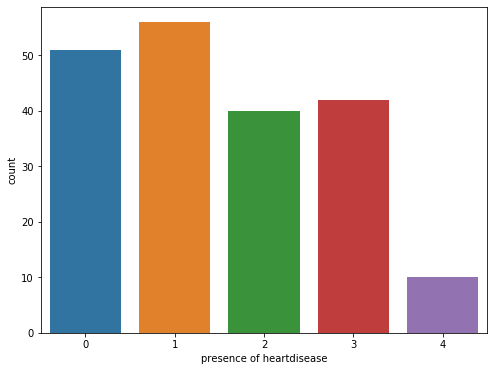

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='presence of heartdisease', data=df1);

In [23]:
df1.groupby(by=['sex', 'presence of heartdisease'])['presence of heartdisease'].count()
#female is 0 and male is 1

sex  presence of heartdisease
0    0                            3
     1                            3
1    0                           48
     1                           53
     2                           40
     3                           42
     4                           10
Name: presence of heartdisease, dtype: int64

In [24]:
df1['sex'].value_counts()

1    193
0      6
Name: sex, dtype: int64

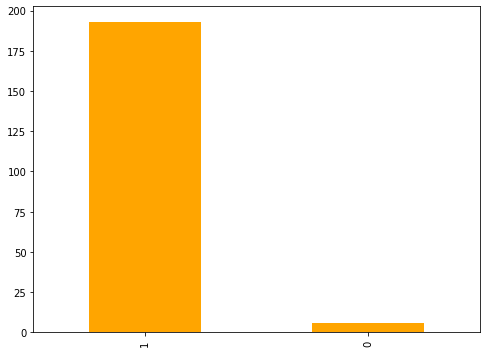

In [25]:
df1['sex'].value_counts().plot.bar(color="orange")

In [26]:
pd.crosstab(df1['sex'], df1['presence of heartdisease'])
#0 is female 1 is male we can say out of 193 males 48 males dont have heart disease while 6 females out of which 3 females dont have heart disease

presence of heartdisease,0,1,2,3,4
sex,,,,,
0,3,3,0,0,0
1,48,53,40,42,10


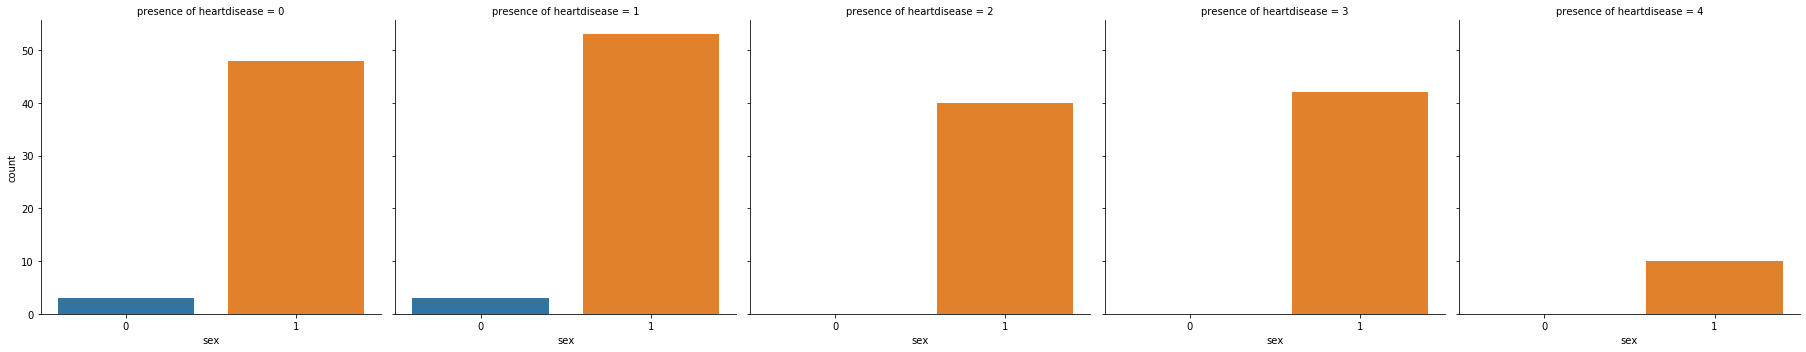

In [27]:
sns.catplot(x='sex', col='presence of heartdisease', kind='count', data=df1);

In [28]:
df1.groupby(by=['cp', 'presence of heartdisease'])['presence of heartdisease'].count()

cp  presence of heartdisease
1   0                            3
    1                            1
    2                            1
    3                            3
2   0                            9
    1                            4
    2                            1
3   0                           16
    1                            9
    2                            8
    3                           11
    4                            3
4   0                           23
    1                           42
    2                           30
    3                           28
    4                            7
Name: presence of heartdisease, dtype: int64

In [29]:
pd.crosstab(df1['cp'], df1['presence of heartdisease'])

presence of heartdisease,0,1,2,3,4
cp,,,,,
1,3,1,1,3,0
2,9,4,1,0,0
3,16,9,8,11,3
4,23,42,30,28,7


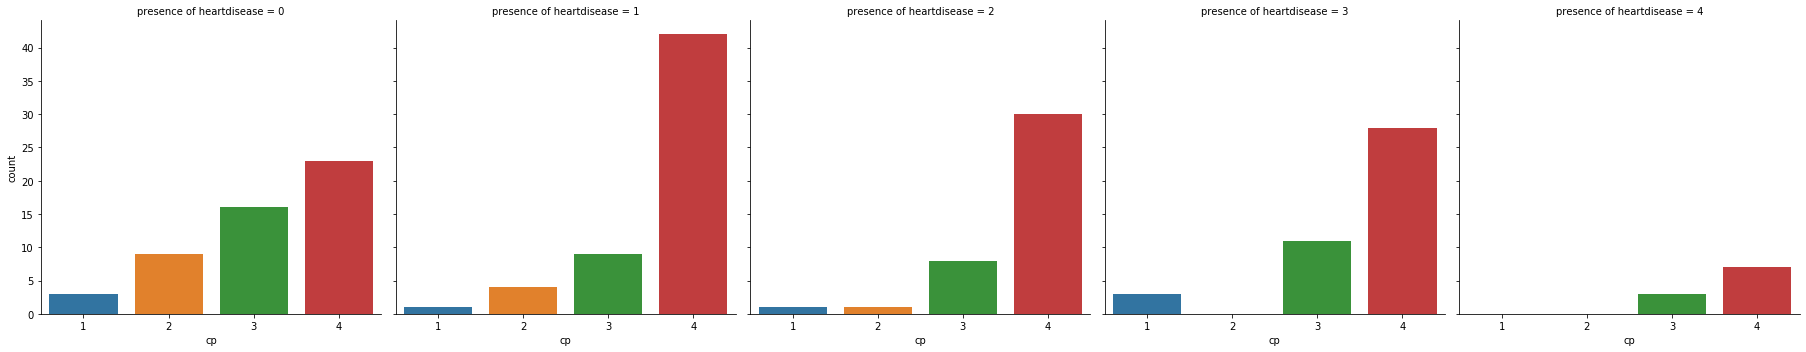

In [30]:
sns.catplot(x='cp', col='presence of heartdisease', kind='count', data=df1);

In [31]:
df1.groupby(by=['slope', 'presence of heartdisease'])['presence of heartdisease'].count()

slope     presence of heartdisease
1.000000  0                            3
          1                            5
          2                            3
          3                            5
2.000000  0                            9
          1                           18
          2                           12
          3                           12
          4                            1
2.134021  0                           36
          1                           27
          2                           16
          3                           19
          4                            4
3.000000  0                            3
          1                            6
          2                            9
          3                            6
          4                            5
Name: presence of heartdisease, dtype: int64

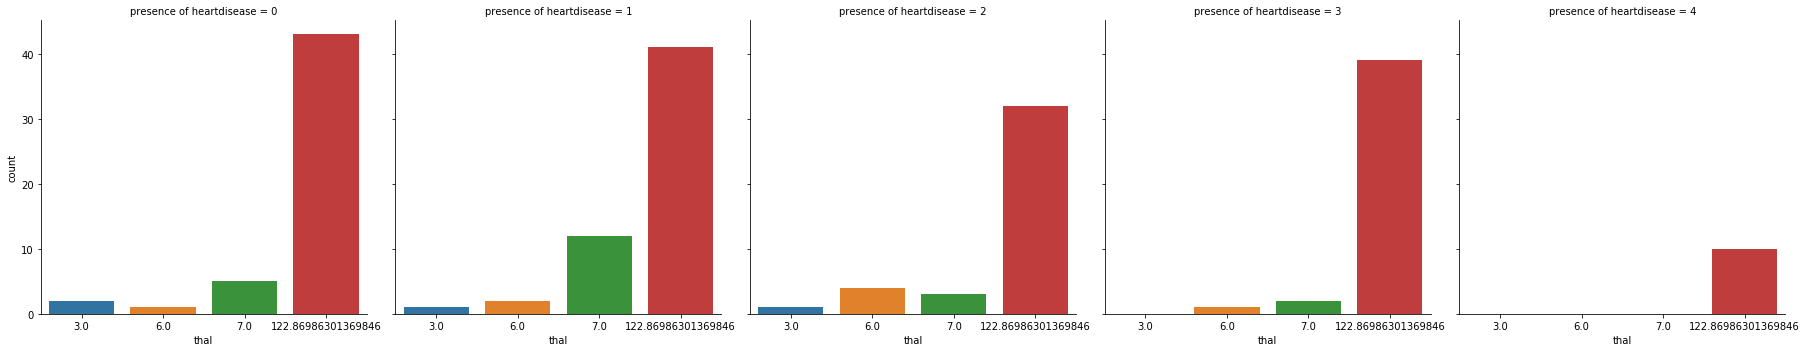

In [32]:
sns.catplot(x='thal', col='presence of heartdisease', kind='count', data=df1)

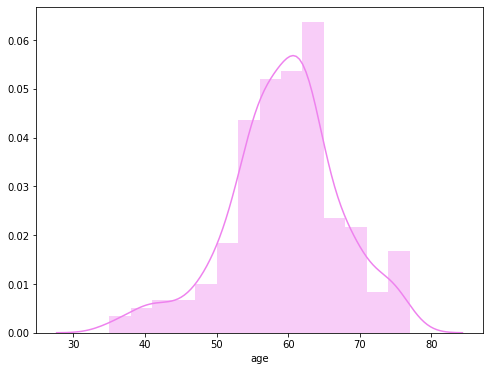

In [33]:
sns.distplot(a=df1['age'], color='violet')
#more spread over 55 to 65 (approx)

In [34]:
df1['age'].value_counts()

62    15
63    14
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64

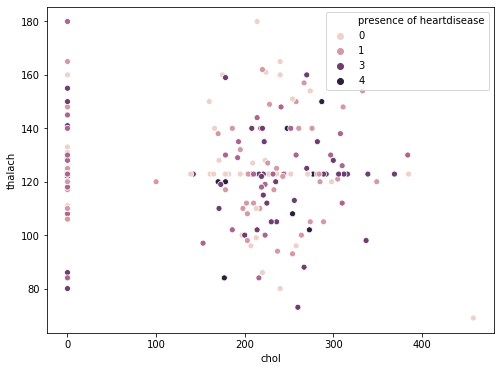

In [35]:
sns.scatterplot(x='chol', y='thalach', data=df1, hue='presence of heartdisease'[:50])

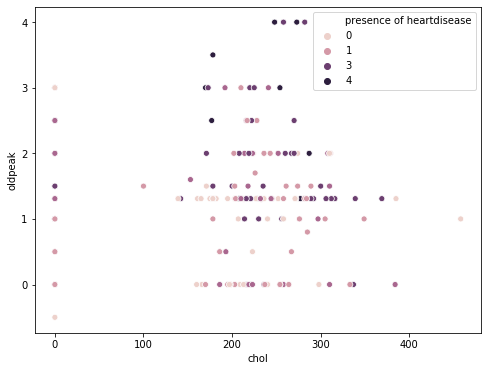

In [36]:
sns.scatterplot(x='chol', y='oldpeak', data=df1, hue='presence of heartdisease'[:50])

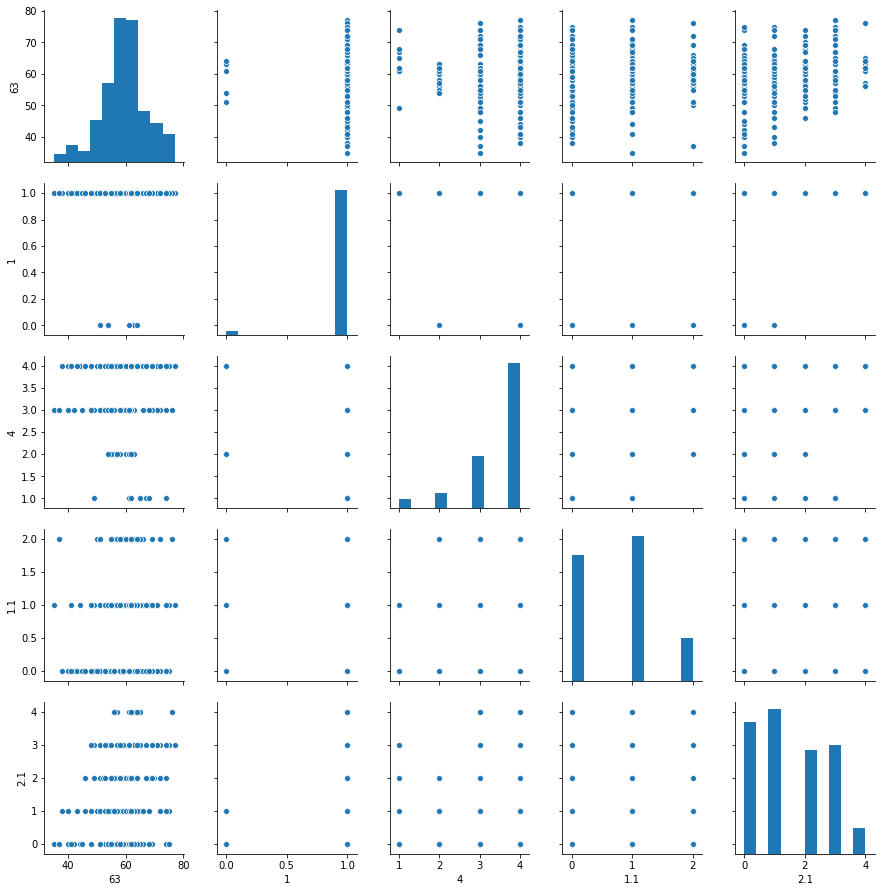

In [37]:
sns.pairplot(df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x27ff388a6c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x27ff329b948>,
 'cmins': <matplotlib.collections.LineCollection at 0x27ff395de48>,
 'cbars': <matplotlib.collections.LineCollection at 0x27ff395d3c8>}

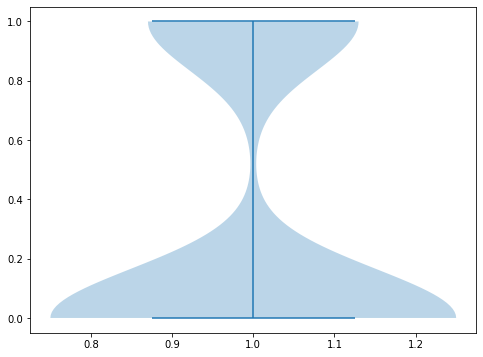

In [38]:
plt.violinplot(df1['fbs'])
#value spread over 0 and 1

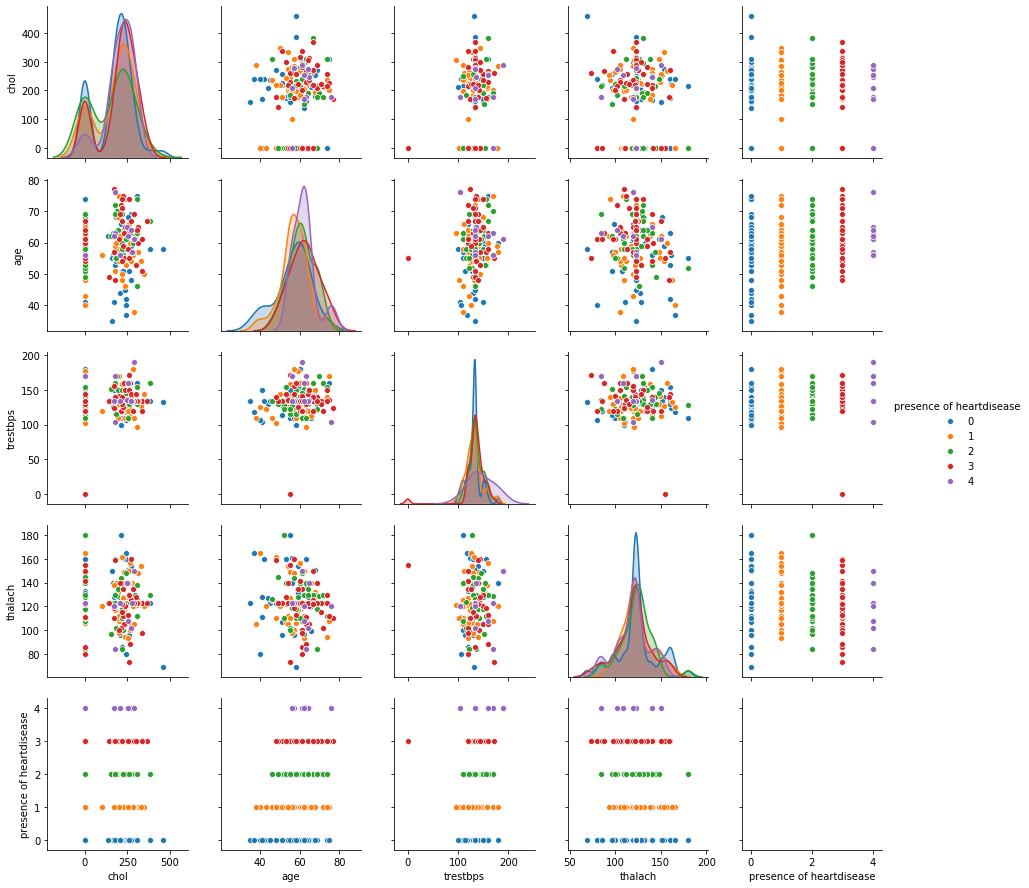

In [39]:
sns.pairplot(df1[['chol', 'age', 'trestbps', 'thalach', 'presence of heartdisease']], hue='presence of heartdisease')

In [40]:
df1.corr()
#restecg and thalach  negatively correalted ca is strongly correlated with presence of heart disease (target variable)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence of heartdisease
age,1.000000,0.033837,-0.039809,0.180915,0.065347,0.137672,0.001487,-0.148786,0.104202,0.154215,0.100705,0.023639,0.068176,0.286630
sex,0.033837,1.000000,0.037525,0.012238,-0.096953,-0.058846,0.060305,-0.001016,-0.009761,0.096219,0.088371,-0.017766,0.075163,0.147190
cp,-0.039809,0.037525,1.000000,0.073888,0.063650,-0.042263,0.033617,-0.122405,0.275582,0.036454,0.029214,-0.063058,-0.132250,0.167202
trestbps,0.180915,0.012238,0.073888,1.000000,0.149121,0.193807,0.091401,-0.012047,0.180187,0.113345,0.092285,-0.018105,-0.011406,0.141186
chol,0.065347,-0.096953,0.063650,0.149121,1.000000,0.176457,0.022824,-0.039052,0.011004,-0.005121,0.059860,0.115585,0.056145,0.075094
fbs,0.137672,-0.058846,-0.042263,0.193807,0.176457,1.000000,0.172306,0.036096,-0.214788,-0.100347,0.005623,0.072594,-0.123030,0.050448
restecg,0.001487,0.060305,0.033617,0.091401,0.022824,0.172306,1.000000,0.013548,-0.087881,-0.111718,-0.018541,0.034462,-0.059072,-0.033597
thalach,-0.148786,-0.001016,-0.122405,-0.012047,-0.039052,0.036096,0.013548,1.000000,-0.059777,0.178435,-0.123312,-0.014081,0.007283,-0.078186
exang,0.104202,-0.009761,0.275582,0.180187,0.011004,-0.214788,-0.087881,-0.059777,1.000000,0.250577,0.091031,-0.106491,-0.130987,0.258847
oldpeak,0.154215,0.096219,0.036454,0.113345,-0.005121,-0.100347,-0.111718,0.178435,0.250577,1.000000,0.230157,-0.020681,0.167466,0.378550


In [41]:
dfcor=df1.corr()

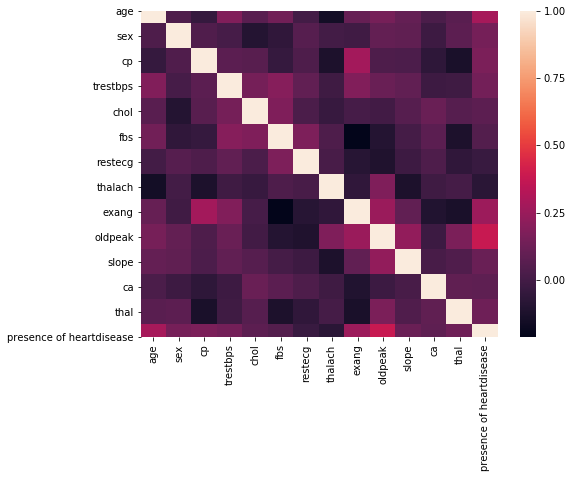

In [42]:
sns.heatmap(dfcor)

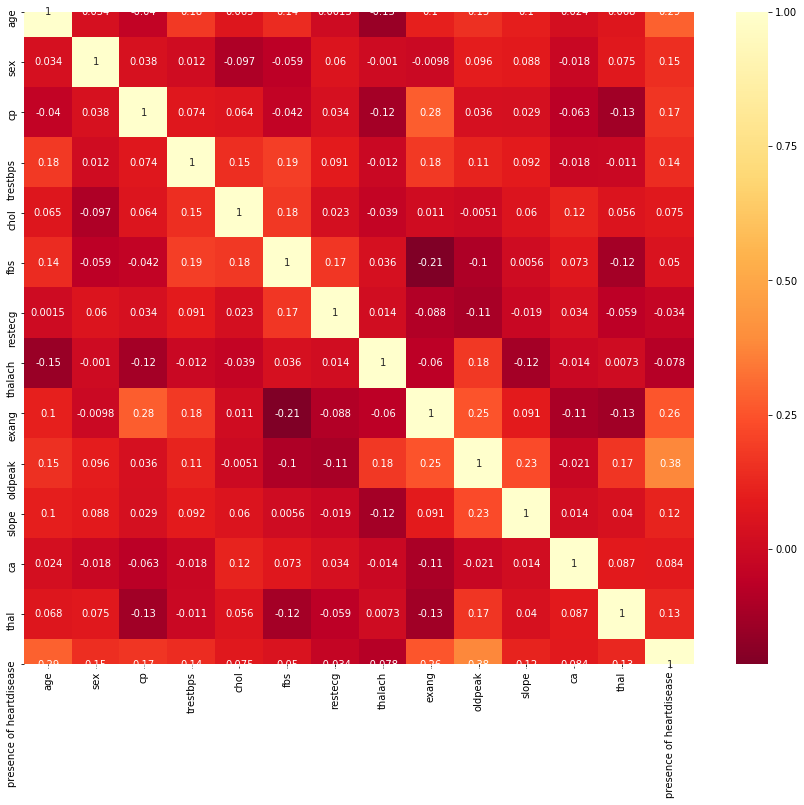

In [43]:
plt.figure(figsize=(15,12))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

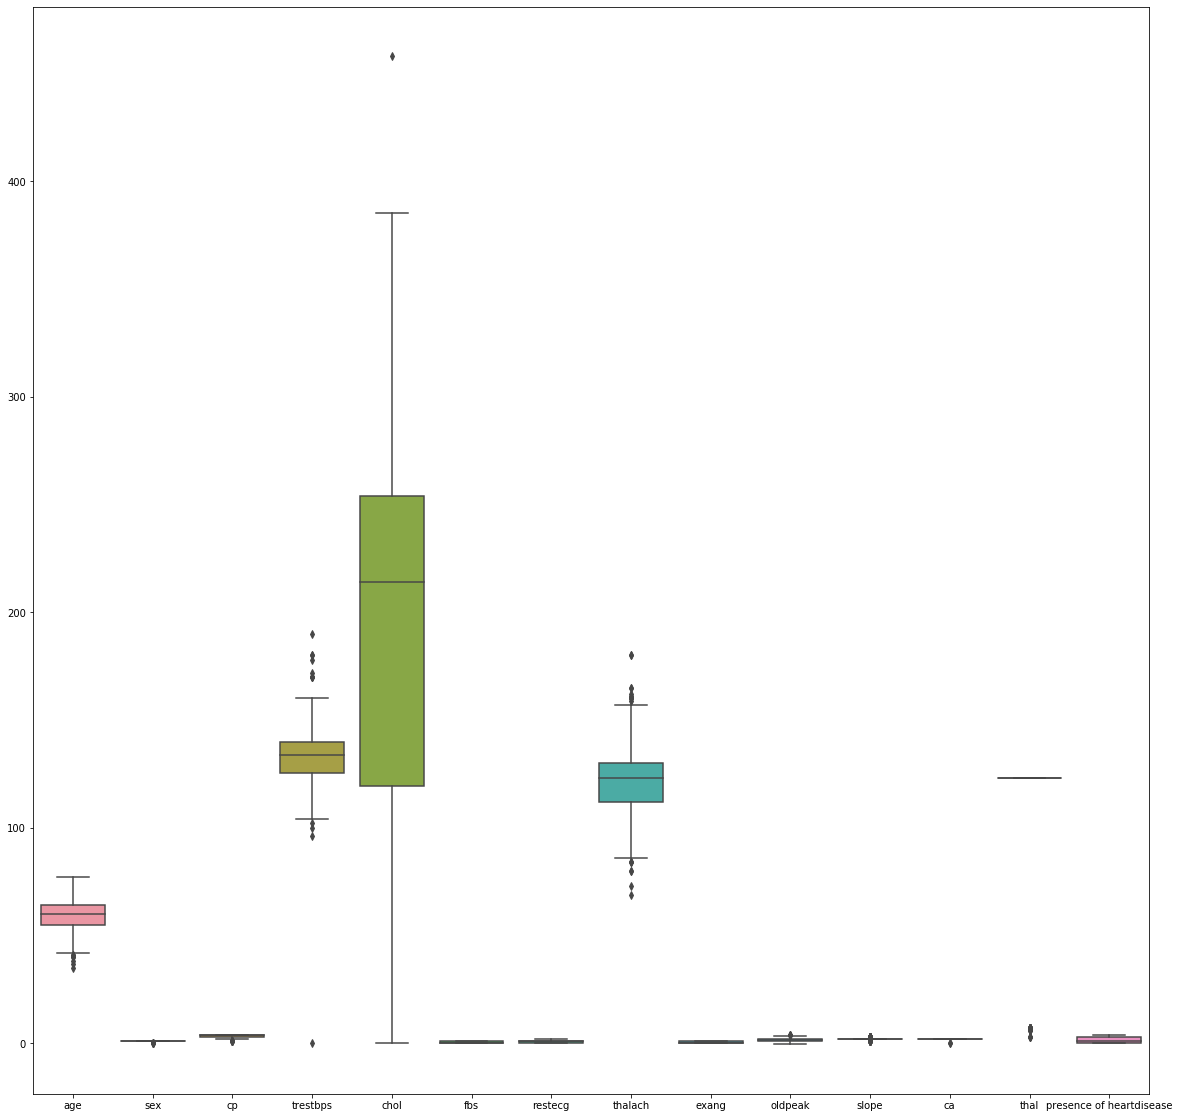

In [44]:
#lets check outliers
plt.figure(figsize = (20,20))
sns.boxplot(data=df1)
#outliers present

In [45]:
#lets remove them
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[1.96373685 0.17631813 0.62583065 ... 0.10075854 0.45390637 1.24498245]
 [0.08560374 0.17631813 0.62583065 ... 0.10075854 0.45390637 0.39575601]
 [0.5548152  0.17631813 0.62583065 ... 0.10075854 0.45390637 0.42461322]
 ...
 [0.5548152  0.17631813 0.62583065 ... 0.10075854 2.20948369 0.39575601]
 [0.17056384 0.17631813 0.62583065 ... 0.10075854 0.45390637 1.24498245]
 [0.34177131 0.17631813 1.89013499 ... 0.10075854 0.45390637 0.42461322]]


In [46]:
threshold=3
print(np.where(z>3))

(array([ 23,  27,  32,  38,  50,  65,  69,  71,  75,  78,  95,  96, 125,
       127, 130, 132, 136, 175, 189, 194, 195], dtype=int64), array([ 7, 11,  3, 11,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2,
        3,  1,  1,  2], dtype=int64))


In [47]:
df1 = df1[(z < 3).all(axis=1)]

In [48]:
df.shape
#outliers removed out of 199rows 178rows left

(199, 14)

In [49]:
#lets prepare x and y


In [50]:
#transforming our data to just 0 and 1 ,0 denotes absence of heart disease while 1 denotes presence of heart disease
df1['presence of heartdisease'].replace([1,2,3,4], 1,inplace=True)

In [51]:
# data transformed
df1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence of heartdisease
192,62,1,4,158.00000,170.0,0.0,1,138.000000,1.0,0.000000,2.134021,2.134021,122.869863,1
193,46,1,4,134.00000,310.0,0.0,0,126.000000,0.0,0.000000,2.134021,2.134021,3.000000,1
196,55,1,4,122.00000,223.0,1.0,1,100.000000,0.0,0.000000,2.134021,2.134021,6.000000,1
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0.0,1.309091,2.134021,2.134021,122.869863,0
198,62,1,2,120.00000,254.0,0.0,2,93.000000,1.0,0.000000,2.134021,2.134021,122.869863,1


In [52]:
x=df1.iloc[:,0:-1]
print(x.shape)
y=df1.iloc[:,-1]
print(y.shape)

(178, 13)
(178,)


In [53]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=52)

In [54]:
lg=LogisticRegression()

In [55]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [57]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.6944444444444444


In [58]:
print(confusion_matrix(test_y,pred))

[[ 1  8]
 [ 3 24]]


In [59]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.75      0.89      0.81        27

    accuracy                           0.69        36
   macro avg       0.50      0.50      0.48        36
weighted avg       0.62      0.69      0.65        36



In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
predgnb=gnb.predict(test_x)
print(accuracy_score(predgnb,test_y))

0.6944444444444444


In [63]:
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

[[ 3  6]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.79      0.81      0.80        27

    accuracy                           0.69        36
   macro avg       0.58      0.57      0.58        36
weighted avg       0.68      0.69      0.69        36



In [64]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
predsvc=svc.predict(test_x)
print('actual and predicted presence of heart disease',accuracy_score(test_y,predsvc))

actual and predicted presence of heart disease 0.75


In [66]:
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

[[ 0  9]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      1.00      0.86        27

    accuracy                           0.75        36
   macro avg       0.38      0.50      0.43        36
weighted avg       0.56      0.75      0.64        36



In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)

In [69]:
predknn

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [70]:
print(classification_report(test_y,predknn))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.79      0.96      0.87        27

    accuracy                           0.78        36
   macro avg       0.73      0.59      0.60        36
weighted avg       0.76      0.78      0.73        36



In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dct=DecisionTreeClassifier()
dct.fit(train_x,train_y)
predknn=knn.predict(test_x)

In [73]:
print(classification_report(test_y,predknn))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.79      0.96      0.87        27

    accuracy                           0.78        36
   macro avg       0.73      0.59      0.60        36
weighted avg       0.76      0.78      0.73        36



In [74]:
from sklearn.model_selection import cross_val_score
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)


[0.7027027  0.77777778 0.85714286 0.77142857 0.77142857]


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_predict=rf.predict(test_x) 

In [76]:
rf_conf_matrix = confusion_matrix(test_y, rf_predict)
rf_acc_score = accuracy_score(test_y, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[ 1  8]
 [ 6 21]]
0.6111111111111112


In [77]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.6944444444444444
[[ 3  6]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.79      0.81      0.80        27

    accuracy                           0.69        36
   macro avg       0.58      0.57      0.58        36
weighted avg       0.68      0.69      0.69        36



In [78]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(train_x,train_y)
print(ls.score(train_x,train_y))
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(test_x,test_y))

0.0034462926344546174
[ 6.95356637e-03  0.00000000e+00  1.28467705e-01  3.79905977e-04
 -1.38486251e-04  1.42053180e-01 -2.86258595e-02 -1.09692233e-03
  1.80778042e-01  5.19566950e-02 -2.37226715e-02  0.00000000e+00
  2.01541779e-04]
0.10956157676062761


In [79]:
dtc=DecisionTreeClassifier(criterion='entropy')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.54011299 0.62105263 0.53044376 0.61818182 0.65038846]
Mean Scores 0.5920359315661393
Standard deviation 0.0477915912419817
Y Prediction values
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0]


array([[ 14,  28],
       [ 23, 113]], dtype=int64)

In [80]:
#lets drop some feature to improve accuracy score


In [81]:
df1['Age_Category']= pd.cut(df1['age'],bins=list(np.arange(25, 85, 5)))

In [82]:
df1 = pd.get_dummies(df1,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','Age_Category'])

In [83]:
df1.drop(['age'],axis=1,inplace=True)

In [84]:
df1.head()

,trestbps,chol,thalach,oldpeak,presence of heartdisease,sex_1,cp_2,cp_3,cp_4,fbs_0.0,...,"Age_Category_(30, 35]","Age_Category_(35, 40]","Age_Category_(40, 45]","Age_Category_(45, 50]","Age_Category_(50, 55]","Age_Category_(55, 60]","Age_Category_(60, 65]","Age_Category_(65, 70]","Age_Category_(70, 75]","Age_Category_(75, 80]"
0,130.0,209.0,127.0,0.0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,132.0,218.0,140.0,1.5,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,142.0,228.0,149.0,2.5,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,110.0,213.0,99.0,1.3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,120.0,0.0,120.0,-0.5,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [85]:
df1.dtypes

trestbps                    float64
chol                        float64
thalach                     float64
oldpeak                     float64
presence of heartdisease      int64
sex_1                         uint8
cp_2                          uint8
cp_3                          uint8
cp_4                          uint8
fbs_0.0                       uint8
fbs_1.0                       uint8
restecg_0                     uint8
restecg_1                     uint8
restecg_2                     uint8
exang_0.0                     uint8
exang_1.0                     uint8
slope_1.0                     uint8
slope_2.0                     uint8
slope_2.134020618556701       uint8
slope_3.0                     uint8
ca_2.134020618556697          uint8
thal_3.0                      uint8
thal_6.0                      uint8
thal_7.0                      uint8
thal_122.86986301369846       uint8
Age_Category_(25, 30]         uint8
Age_Category_(30, 35]         uint8
Age_Category_(35, 40]       

In [ ]:
#by geeting dummies there is a improvement in accuracy score

In [86]:
y = df1['presence of heartdisease']
x = df1.drop(['presence of heartdisease'],  axis =1)

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.34,random_state = 5)

In [133]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
lg.score(x_test,y_test)

0.8032786885245902

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test) 

In [136]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[ 2 11]
 [ 3 45]]
0.7704918032786885


In [137]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5901639344262295
[[ 3 10]
 [15 33]]
              precision    recall  f1-score   support

           0       0.17      0.23      0.19        13
           1       0.77      0.69      0.73        48

    accuracy                           0.59        61
   macro avg       0.47      0.46      0.46        61
weighted avg       0.64      0.59      0.61        61



In [138]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred = lg.predict(x_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.80      1.00      0.89        48

    accuracy                           0.80        61
   macro avg       0.90      0.54      0.52        61
weighted avg       0.84      0.80      0.73        61



In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [143]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.81      0.96      0.88        48

    accuracy                           0.79        61
   macro avg       0.65      0.56      0.56        61
weighted avg       0.74      0.79      0.74        61



In [144]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [145]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.65634675 0.70526316 0.62606838 0.60268318 0.47649573]
Mean Scores 0.6133714376438835
Standard deviation 0.07655243573747142
Y Prediction values
[0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


array([[ 18,  24],
       [ 27, 109]], dtype=int64)

In [146]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [147]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [148]:
y_pred_prob

array([0.92790249, 0.51885493, 0.9178585 , 0.73134691, 0.83858351,
       0.58864521, 0.78874932, 0.76579414, 0.64045741, 0.90085671,
       0.82600125, 0.93856893, 0.73083416, 0.88360561, 0.9436089 ,
       0.57391491, 0.58226261, 0.87252797, 0.97627676, 0.70981523,
       0.8494348 , 0.94079839, 0.91415164, 0.9221373 , 0.50539959,
       0.81858708, 0.90238694, 0.94155038, 0.53109086, 0.79127426,
       0.90847732, 0.57785595, 0.8224972 , 0.83852336, 0.84176478,
       0.86692028, 0.92526607, 0.85564422, 0.8451138 , 0.88985978,
       0.93177085, 0.82646254, 0.87988388, 0.8042614 , 0.98142243,
       0.8551824 , 0.93610161, 0.78817515, 0.68248087, 0.75980855,
       0.66609469, 0.86075514, 0.4361476 , 0.76336437, 0.66073668,
       0.83510665, 0.59045654, 0.51752822, 0.85317835, 0.9060932 ,
       0.76663003])

In [149]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [150]:
fpr

array([0.        , 0.        , 0.        , 0.07692308, 0.07692308,
       0.15384615, 0.15384615, 0.23076923, 0.23076923, 0.30769231,
       0.30769231, 0.38461538, 0.38461538, 0.46153846, 0.46153846,
       0.53846154, 0.53846154, 0.61538462, 0.61538462, 0.69230769,
       0.69230769, 0.84615385, 0.84615385, 0.92307692, 0.92307692,
       1.        ])

In [151]:
tpr

array([0.        , 0.02083333, 0.1875    , 0.1875    , 0.20833333,
       0.20833333, 0.22916667, 0.22916667, 0.375     , 0.375     ,
       0.4375    , 0.4375    , 0.625     , 0.625     , 0.64583333,
       0.64583333, 0.6875    , 0.6875    , 0.75      , 0.75      ,
       0.85416667, 0.85416667, 0.875     , 0.875     , 1.        ,
       1.        ])

In [152]:
thresholds

array([1.98142243, 0.98142243, 0.92790249, 0.92526607, 0.9221373 ,
       0.9178585 , 0.91415164, 0.90847732, 0.87252797, 0.86692028,
       0.8551824 , 0.85317835, 0.8224972 , 0.81858708, 0.8042614 ,
       0.79127426, 0.78817515, 0.76663003, 0.75980855, 0.73134691,
       0.66073668, 0.59045654, 0.58864521, 0.58226261, 0.50539959,
       0.4361476 ])

In [153]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [154]:
print(auc_score)

0.5384615384615384


In [122]:
#logistic regression is giving a accuracy of 0.80

In [155]:
lg_cv_score = cross_val_score(lg, x, y, cv=10)

In [156]:
lg_cv_score

array([0.78947368, 0.68421053, 0.88888889, 0.77777778, 0.72222222,
       0.88888889, 0.76470588, 0.82352941, 0.82352941, 0.76470588])

In [159]:
from sklearn.externals import joblib
joblib.dump(lg,'lgheart.obj')
lg_from_joblib=joblib.load('lgheart.obj')